# 필요한 임포트 저장

In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
from konlpy.tag import Okt # 옛날 Twitter 클래스
from konlpy.tag import Kkma
import re

# 데이터 불러오기 & 데이터 정제 

In [2]:
# 다음리뷰 word

daumword = pd.read_csv("data_review_word.csv", index_col=False)
daumword_ = daumword[['영화명','word']]
daumword_ = daumword_.drop_duplicates(['영화명'], keep='first')
tokenized_reviews = daumword_['word']

# 특수 문자 없는 코드

In [3]:
sentences = []

for words in tokenized_reviews:
    sentence = re.sub('[^가-힣\s]*[\n]*', '',str(words)).split(" ")
    sentences.append(sentence)

# word2vector 모델 세우기

In [11]:

from gensim.models import Word2Vec
# embedding_model = Word2Vec(sentences, size=100, window = 4, min_count=20, workers=4, iter=100, sg=1)
# # Word2Vec 모델저장
# embedding_model.save('word2VecModel.model')

# 저장모델 불러오기

In [14]:
# Word2Vec 모델 불러오기
from gensim.models import Word2Vec
embedding_model = Word2Vec.load('word2VecModel.model')

# 한글 처리 코딩

In [15]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')

# keyword 받아 시각화 처리하기

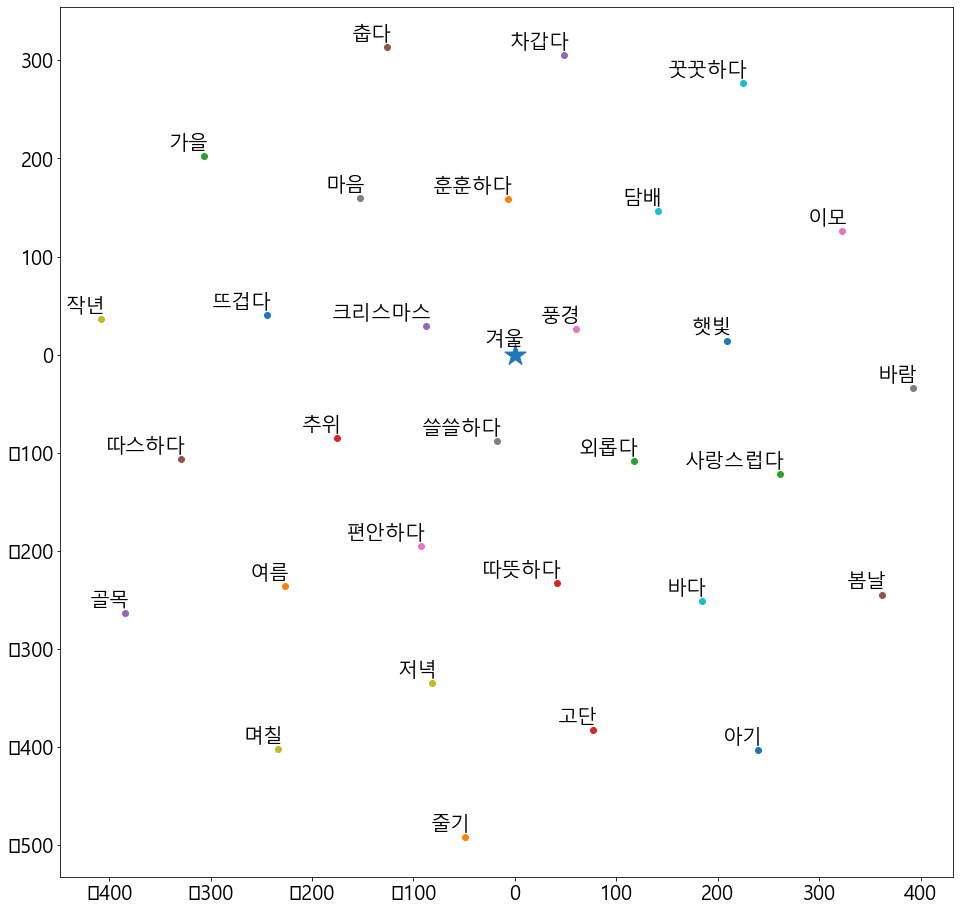

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

while True:
    try: 

        keyword = input("키워드 입력 : ")
            
        labels = []
        tokens = []
        okt = Okt()



        keyword2 = okt.morphs(keyword, stem=True)
        VecWords = embedding_model.most_similar(positive=[keyword2[0]], topn=30)
        tokens = []
        labels = []
        for i in VecWords :
            labels.append(i[0])
            tokens.append(embedding_model[i[0]])

        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
        new_values = tsne_model.fit_transform(tokens)

        x = []
        y = []
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        # print(x, y)
        plt.figure(figsize=(16, 16)) 

        # plt.annotate(keyword)
        plt.rc("font", size = 20)
        plt.scatter(0, 0, s = 500, marker= '*')
        plt.annotate(keyword,
                        xy=(0, 0),
                        xytext=(10, 5),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')
        for i in range(len(x)):

            plt.scatter(x[i],y[i])
            plt.annotate(labels[i],
                        xy=(x[i], y[i]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')

        plt.show()
        break

    except KeyError: 
        print('다시 입력해주세요. 키워드가 존재하지 않습니다. ')
        pass
        